In [21]:
class DiGraph:           # directed graph
    
    def __init__(self):      
        self.g={}


In [93]:
  def add_node(self,node):
        
        if node not in self.g:        # if node not in graph insert it
            self.g[node]=[]
            
DiGraph.add_node=add_node

In [94]:
  def add_edge(self,src,dest):
        
        if src in self.g and dest in self.g and dest not in self.g[src]:  # if both src,dest in graph and if edges does exists
            self.g[src].append(dest)
        
        elif src not in self.g:    #raise error
            raise KeyError(str(src)+" not in graph")
        
        elif src not in self.g:
            raise KeyError(str(dest)+" not in graph")
DiGraph.add_edge=add_edge            
            

In [22]:
import networkx as nx
import matplotlib.pyplot as plt


In [23]:
def draw_graph_with_nx(graph):
    pos=nx.spring_layout(graph,iterations=200)
    options={'node_color':'white','alpha':1,'node_size':2000,'width':0.002,'font_family':'Arial','font_size':25,'arrows':True,
             'edge_color':'brown','arrowstyle':'Fancy,head_length=1,head_width=1,tail_width=.4'}
    labels=nx.get_node_attributes(graph,'label')
    nx.draw(graph,pos,labels=labels,**options)
    plt.show

In [24]:
def draw_graph(self):
    G=nx.DiGraph()
    for src in self.g:
        G.add_node(src,label=src)
        for dest in self.g[src]:
            G.add_edge(src,dest)
    draw_graph_with_nx(G)
DiGraph.draw_graph=draw_graph    

In [25]:
g=DiGraph()


In [26]:
nodes=['a','b','c','d','e','f']
edges=[ ['a','b'], ['a','c'], ['b','c'], ['b','d'], ['c','d'], ['d','c'], ['e','f'], ['f','c'],    ]



In [27]:

for node in nodes:
    g.add_node(node)
for edge in edges:
    g.add_edge(edge[0],edge[1])

In [28]:
g.traversal('e',print)

AttributeError: 'DiGraph' object has no attribute 'traversal'

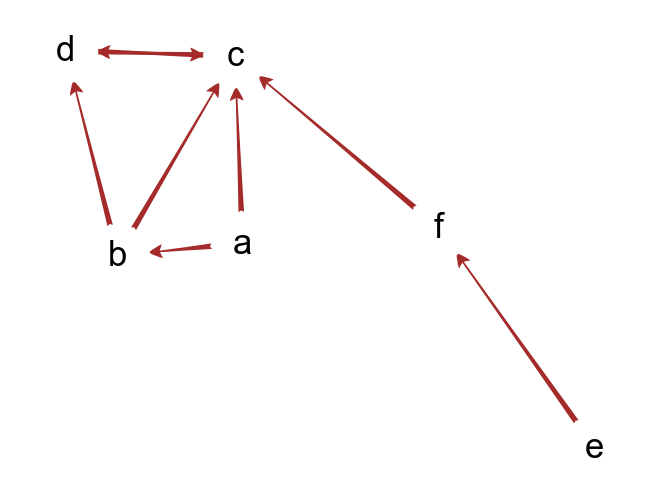

In [29]:
g.draw_graph()

In [45]:
def find_path(self,src,dest,path=[]):
    
    """ find path (not neccesarily shortest) from source to dest"""
    if src not in self.g:
        raise KeyError(str(src)+" not in graph")
    if dest not in self.g:
        raise KeyError(str(dest)+" not in graph")
    
    all_path=[]
    path.append(src)
    
    #base case
    if src==dest:
        return path
    

    #recursive case
    for node in self.g[src]:
        
        # need to avoid cycle
        if node not in path:
            
            #find path from next node to dest
            new_path=self.find_path(node,dest,path)
            
            if new_path:
                return new_path
            
            
    # if no path can be found from any next nodes to dest,ther's not path!
    return None
DiGraph.find_path=find_path            

In [49]:
print(g.g)
g.find_path('a','d')

{'a': ['b', 'c'], 'b': ['c', 'd'], 'c': ['d'], 'd': ['c'], 'e': ['f'], 'f': ['c']}


['a', 'b', 'c', 'd']

In [89]:
def find_all_path(self,src,dest,path=[]):
    
    """ find path (not neccesarily shortest) from source to dest"""
    if src not in self.g:
        raise KeyError(str(src)+" not in graph")
    if dest not in self.g:
        raise KeyError(str(dest)+" not in graph")
    
    all_path=[]
    
    #save path we have traversed till now
    path=path+[src]
    
    #base case
    if src==dest:
        return [ path ]    #because we have many so dont return 1d list
    

    #recursive case
    for node in self.g[src]:
        
        # need to avoid cycle
        if node not in path:
            
            #find path from next node to dest
            new_path=self.find_all_path(node,dest,path)
            
            #appending to all paths if you got a path from this neighbour
            if new_path:
                for paths in new_path:
                        all_path.append(paths)
                
            
            
    #if there was not path empty list will be returend
    return all_path
DiGraph.find_all_path=find_all_path            

In [90]:
print(g.g)
g.find_all_path('a','d')

{'a': ['b', 'c'], 'b': ['c', 'd'], 'c': ['d'], 'd': ['c'], 'e': ['f'], 'f': ['c']}


[['a', 'b', 'c', 'd'], ['a', 'b', 'd'], ['a', 'c', 'd']]

# shortest path

In [91]:
def find_shortest_path(self,src,dest,path=[]):
    
    """ find path  shortest from source to dest"""
    if src not in self.g:
        raise KeyError(str(src)+" not in graph")
    if dest not in self.g:
        raise KeyError(str(dest)+" not in graph")
    
    shortest=None
    
    #save path we have traversed till now
    path=path+[src]
    
    #base case
    if src==dest:
        return [ path ]    #because we have many so dont return 1d list
    

    #recursive case
    for node in self.g[src]:
        
        # need to avoid cycle
        if node not in path:
            
            #find path from next node to dest
            new_path=self.find_shortest_path(node,dest,path)
            
            #appending to all paths if you got a path from this neighbour
            if new_path:
                if shortest is None or len(new_path)<=len(shortest):
                    shortest=new_path

            
            
    #if there was not path empty list will be returend

    return shortest
DiGraph.find_shortest_path=find_shortest_path            

In [92]:
print(g.find_all_path('a','c'))
print(g.find_shortest_path('a','c'))

[['a', 'b', 'c'], ['a', 'b', 'd', 'c'], ['a', 'c']]
[['a', 'c']]
